# Implemrnting Logistic Regression from Scratch

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

## Function Implementation

In [2]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def add_const(X: pd.DataFrame):
    X['const'] = 1
    return X

def predict(parameters, X):
    y_pred = sigmoid(np.dot(X, parameters))
    return y_pred

def LL(model, parameters):
    y_pred = sigmoid(np.dot(model.X, parameters))
    log_l = model.Y * np.log(y_pred) + (1 - model.Y) * np.log(1 - y_pred)
    return np.sum(log_l)

def gradient_descent(model, n_iter, learning_rate):
    parameters = np.array(model.params)
    LL_record = np.ones(n_iter)
    for i in range(n_iter):
        Y_pred = sigmoid(np.dot(model.X, parameters))
        gradient = np.dot(model.X.T, (model.Y - Y_pred)) / model.X.shape[0]
        parameters += learning_rate * gradient
        LL_record[i] = LL(model, parameters)
    return parameters, LL_record

class Logistic_Reg():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.params = np.zeros((X.shape[1]), dtype=float)

    def fit(self):
        n_iter = 10000
        learning_rate = 0.00005
        self.params, LL_record = gradient_descent(self, n_iter, learning_rate)
        return self, LL_record

    def pred(self):
        Y_pred = predict(self.params, self.X)
        return Y_pred

In [3]:
#log_l = model.Y * y_pred - np.log(1 + np.exp(y_pred))
# n_iter = 10k, lr = 0.0000001

Load Data

In [4]:
# dat_dir = './'

github_url = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_url + 'main/assignments/'

df_lr = pd.read_csv(dat_dir + "stroke_data.csv", index_col=0)

In [5]:
df_lr.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,stroke
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,0
70031,1,71.0,1,0,1,1,195.25,33.3,0,0
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,0
38078,1,82.0,1,1,1,0,73.19,33.5,0,0


In [6]:
X = df_lr[df_lr.columns[:-1]]
Y = df_lr[df_lr.columns[-1]]

In [7]:
print(np.dot(X.T, Y))
print(np.dot(X.iloc[:, 1].T, Y))

[  105.   12250.      57.      36.     160.      86.   24618.62  5517.3
    39.  ]
12250.0


In [8]:
X = add_const(X)
model_t = Logistic_Reg(X, Y)
X.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,const
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,1
70031,1,71.0,1,0,1,1,195.25,33.3,0,1
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,1
38078,1,82.0,1,1,1,0,73.19,33.5,0,1


In [9]:
model_t, log_likelihood_record = model_t.fit()
print(model_t.params)
print(log_likelihood_record)



[-0.01079728  0.03468197  0.00947608  0.00514704 -0.00647502 -0.0079056
  0.0039536  -0.12670975 -0.00170544 -0.01431033]
[-625.44184234 -593.3506951  -573.71828144 ... -429.13504338 -429.13496835
 -429.13489333]


In [16]:
write_path = 'write'

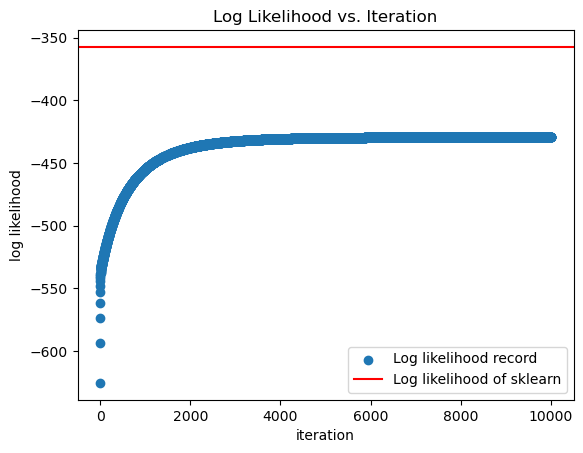

In [19]:
# plot log_likelihood_record and LL_sk
LL_sk = - 357.35
plt.scatter(np.arange(10000), log_likelihood_record)
plt.axhline(y=LL_sk, color='r', linestyle='-')
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('Log Likelihood vs. Iteration')
plt.legend(['Log likelihood record', 'Log likelihood of sklearn'])
plt.savefig(write_path + '/LL_small_iter.png')
plt.show()

In [11]:
print(model_t.pred())

[1.76288089e-01 2.65985580e-01 5.26505521e-01 6.01975235e-01
 2.44447092e-01 1.03581811e-01 7.98832471e-02 5.08177939e-02
 5.39110696e-01 3.59293744e-01 1.73026267e-02 1.14920634e-01
 3.55439512e-01 5.63258887e-01 2.25782775e-01 1.13939583e-01
 2.54997946e-01 1.99992663e-01 9.47405991e-02 2.37858748e-01
 7.60183439e-03 4.46470714e-01 2.91245948e-01 1.04610262e-01
 1.18865075e-01 1.87752219e-01 2.32268277e-01 2.52468800e-01
 1.52239288e-01 4.83322189e-02 1.75111861e-01 2.29802887e-02
 1.30113924e-01 2.61709128e-01 2.96575497e-01 9.83407076e-02
 1.18322096e-01 4.63103728e-01 6.79089493e-01 2.30166325e-01
 1.98678385e-01 8.33296500e-02 3.30145431e-01 5.27035384e-02
 4.19875709e-01 1.83968028e-01 9.62993516e-02 1.07170182e-01
 2.42329668e-01 5.56683620e-01 9.18750823e-02 1.71058198e-01
 2.10404412e-02 2.99733963e-01 1.53825729e-01 4.55333475e-01
 2.60466405e-01 1.89572025e-01 3.11471271e-02 1.09462785e-02
 5.64698121e-02 5.33930260e-02 2.50868534e-01 3.98960755e-01
 1.79296567e-01 3.705319

## sklearn

In [12]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X, Y)
print(model_sk.coef_)
print(model_t.params)

[[ 6.61724176e-02  7.14594239e-02  3.83358587e-01  2.30303172e-01
  -2.70537499e-01 -2.24349174e-02  4.40739044e-03  1.32447120e-03
   4.18715650e-01 -2.84735793e+00]]
[-0.01079728  0.03468197  0.00947608  0.00514704 -0.00647502 -0.0079056
  0.0039536  -0.12670975 -0.00170544 -0.01431033]


/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
Y_pred_sk = pd.DataFrame(data=model_sk.predict_proba(X)[:, 1])
log_likelihood_sk = np.dot(Y, np.log(Y_pred_sk)) + np.dot((1 - Y), np.log(1 - Y_pred_sk))
print(log_likelihood_sk)
print(model_sk.score(X, Y))

[-357.85170201]
0.8214285714285714


## statsmodels

In [14]:
import statsmodels.api as sm

model_stat = sm.Logit(Y, X).fit()
model_stat.summary()


Optimization terminated successfully.
         Current function value: 0.364640
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                  980
Model:                          Logit   Df Residuals:                      970
Method:                           MLE   Df Model:                            9
Date:                Fri, 14 Jul 2023   Pseudo R-squ.:                  0.2354
Time:                        13:45:12   Log-Likelihood:                -357.35
converged:                       True   LL-Null:                       -467.38
Covariance Type:            nonrobust   LLR p-value:                 2.028e-42
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_female             0.1219      0.196      0.623      0.533      -0.262       0.505
age                   0.0760      0.008      9.963      0.000       0.061       0.091
hypertension          0.4018      0.221      1.820      0.069      -0.031       0.835
heart_disease         0.3143      0.268      1.172      0.241      -0.211       0.840
ever_married         -0.2905      0.312     -0.931      0.352      -0.902       0.321
Rural_residence       0.0235      0.189      0.124      0.901      -0.347       0.394
avg_glucose_level     0.0044      0.002      2.623      0.009       0.001       0.008
bmi                   0.0094      0.014      0.659      0.510      -0.019       0.037
smoking               0.5304      0.238      2.231      0.026       0.064       0.996
const                -6.8913      0.756     -9.112      0.000      -8.374      -5.409
=====================================================================================
"""

In [15]:
print(model_sk.coef_)
print(model_t.params)

[[ 6.61724176e-02  7.14594239e-02  3.83358587e-01  2.30303172e-01
  -2.70537499e-01 -2.24349174e-02  4.40739044e-03  1.32447120e-03
   4.18715650e-01 -2.84735793e+00]]
[-0.01079728  0.03468197  0.00947608  0.00514704 -0.00647502 -0.0079056
  0.0039536  -0.12670975 -0.00170544 -0.01431033]
